# Dynamic height from TS observation

In [1]:
import numpy as np
import numpy.matlib
import gsw
import matplotlib.pyplot as plt
import netCDF4 as nc

In [2]:
# get T,S data from World Ocean Atlas
# read in netCDF
df=nc.Dataset('woa18_decav_t00_01.nc')
dfs=nc.Dataset('woa18_decav_s00_01.nc')
print(df.variables.keys()) # shows the name of variables

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


In [3]:
lat=df['lat'][:]
lon=df['lon'][:]
lev=df['depth'][:]
temp=df['t_an'][0,:,:,:]
salt=dfs['s_an'][0,:,:,:]

In [4]:
# set up LONG, LAT and P in 3D array
xm,ym=np.meshgrid(lon,lat)
LONG=np.repeat(xm[None,:,:],102,axis=0) # create a 3D array by repeating x and y
LAT=np.repeat(ym[None,:,:],102,axis=0) # create a 3D array by repeating x and y
lev2=np.repeat(lev[:,None],180,axis=1)
P=np.repeat(lev2[:,:,None],360,axis=2) # create a 3D array by repeating z

In [5]:
# calculate SA and CT
sa=gsw.SA_from_SP(salt,P,LONG,LAT)
ct=gsw.CT_from_t(sa,temp,P)

In [6]:
# calculate dynamic height (geopotential = gZ) wrt 2000 dbar 
gZ = gsw.geo_strf_dyn_height(sa,ct,P,2000)
Z = gZ/9.8

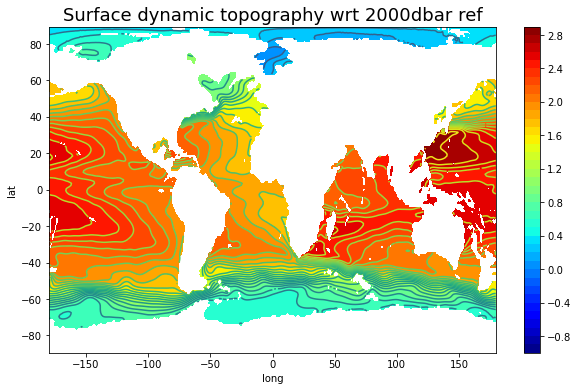

In [7]:
# plot surface dynamic height wrt 2000 dbar
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
plt.contourf(xm,ym,Z[0,:,:],cnt,cmap='jet')
plt.colorbar()
plt.contour(xm,ym,Z[0,:,:],cnt,linestyles='solid')
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Surface dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()

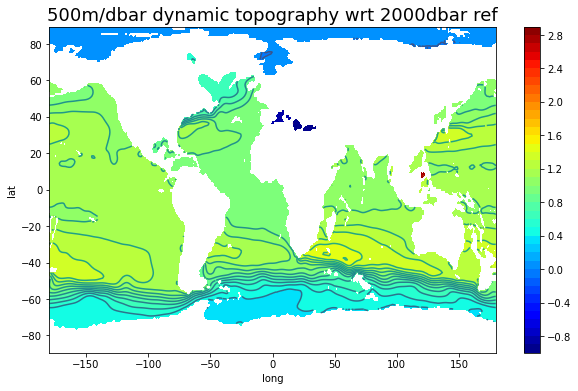

In [8]:
# plot 500dbar level dynamic height wrt 2000 dbar
ind=(lev==500)
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
Z2d=np.squeeze(Z[ind,:,:])
plt.contourf(xm,ym,Z2d,cnt,cmap='jet')
plt.colorbar()
plt.contour(xm,ym,Z2d,cnt,linestyles='solid')
plt.xlabel('long')
plt.ylabel('lat')
plt.title('500m/dbar dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()